In [17]:
import os
import re
import uproot
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 3)

In [24]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Charge/old_tools/pdf2d.root")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Charge/charge2D_and_unhit.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

In [25]:
print(f.classnames())
print(of.classnames())

{'charge2D;1': 'TH2D', 'PUnhit;1': 'TGraph', 'hPunhitPar_type0;1': 'TH1D'}
{'hst2d_type0;1': 'TH2D', 'hnHit_type0;1': 'TH1D', 'hnTot_type0;1': 'TH1D', 'hst2d_type1;1': 'TH2D', 'hnHit_type1;1': 'TH1D', 'hnTot_type1;1': 'TH1D', 'gPHit_type0;1': 'TGraphAsymmErrors', 'hPunhitPar_type0;1': 'TH1D', 'gPHit_type1;1': 'TGraphAsymmErrors', 'hPunhitPar_type1;1': 'TH1D'}


In [26]:
# read 2D histogram
Hq, mubins, qbins = f["charge2D"].to_numpy()
# unhit probability
mus, PUnhit = f["PUnhit"].values()
# get PUnhit fit parameters
pars, _ = f["hPunhitPar_type0"].to_numpy()

# old
oHq, _, _   = of["hst2d_type0"].to_numpy()
omus, oPHit = of["gPHit_type0"].values()
opars, _    = of["hPunhitPar_type0"].to_numpy()
oPUnhit = 1. - oPHit

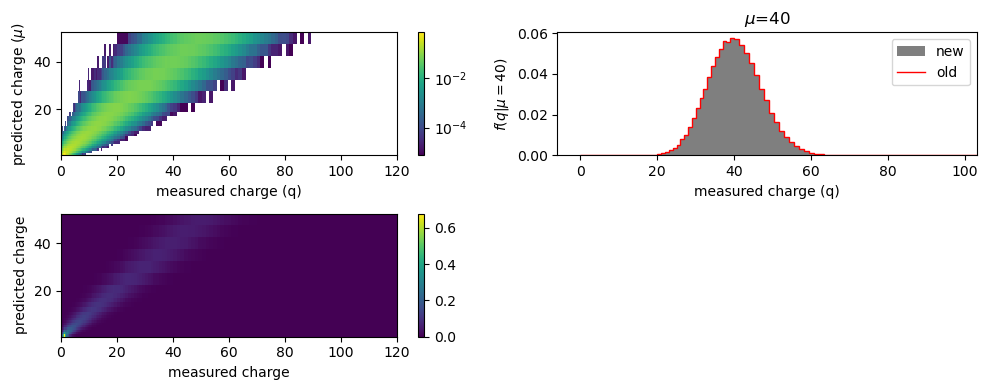

In [27]:
plt.figure(figsize=[10, 4])

# plot 2D
plt.subplot(221)
plt.pcolormesh(qbins, mubins, Hq, norm="log")
plt.xlabel("measured charge (q)")
plt.ylabel(r"predicted charge ($\mu$)")
plt.colorbar()

# plot projection
plt.subplot(222)
mu = 40
index = np.digitize(mu, mubins)-1
qs  = ( qbins[1:] + qbins [:-1])/2.
plt.title(rf"$\mu$={mu}")
plt.stairs( Hq[index], qbins, label="new", color="k", fill=True, alpha=0.5)
plt.stairs(oHq[index], qbins, label="old", color="r")
plt.xlim([None, mu+np.sqrt(mu)*10])
plt.ylim([0, None])
plt.xlabel("measured charge (q)")
plt.ylabel(rf"$f(q|\mu={mu})$")
plt.legend()

# old 2D
plt.subplot(223)
plt.pcolormesh(qbins, mubins, oHq)
plt.xlabel("measured charge")
plt.ylabel("predicted charge")
plt.colorbar()

plt.tight_layout()

In [28]:
mubins

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 11. ,
       13. , 15. , 17. , 19. , 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5])

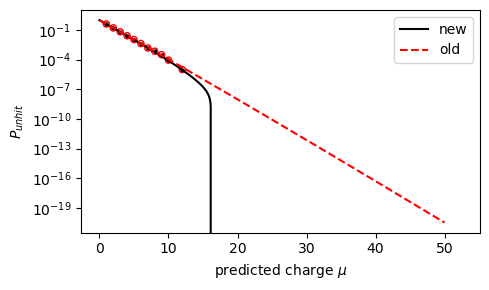

In [29]:
def PUnhit_func(x, a1, a2, a3):
    return (1. + a1*x + a2*x**2 + a3*x**3)*np.exp(-x)

plt.figure(figsize=[5, 3])
# new
plt.scatter(mus, PUnhit, color="k", s=5)
x = np.linspace(0, np.max(mus), 1000)
plt.plot(x, PUnhit_func(x, *pars[:3]), color="k", label="new")

# old
plt.scatter(omus, oPUnhit, edgecolor="red", s=20, c="none")
x = np.linspace(0, np.max(mus), 1000)
plt.plot(x, PUnhit_func(x, *opars[:3]), color="r", label="old", linestyle="--")

plt.xlabel(rf"predicted charge $\mu$")
plt.ylabel(r"$P_{unhit}$")


plt.yscale("log")
# plt.xlim([None, 20])
# plt.ylim([1e-7, None])
plt.legend()
plt.tight_layout()